<a href="https://colab.research.google.com/github/lukaszsliwinski/digit-recognizer/blob/master/digit_recognizer_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CNN model for digit recognition**

##**Introduction**
##### Model based on youtube tutorial
##### https://www.youtube.com/watch?v=kY14KfZQ1TI&list=PLCC34OHNcOtpcgR9LEYSdi9r7XIbpkpK1&ab_channel=Codemy.com


##**Imports**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

##**Preparing data**

In [2]:
# Convert MNIST image files into a o4-dimensions Tensor (images, height, width and color channels)
transform = transforms.ToTensor()

# Train data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

# Test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16037128.84it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 445373.10it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3478101.30it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4357394.50it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [3]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

##**CNN model**

In [4]:
class DigitRecognitionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    # Convolution and pooling layers
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # Re-view to flatten it out
    X = X.view(-1, 16*5*5)

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

# Instance of model
torch.manual_seed(41)
model = DigitRecognitionModel()

##**Training process**

In [5]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
import time
start_time = time.time()

# Create variables to tracks things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i} | Batch: {b} | Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():  # No gradient so we don't update our weights and biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]  # adding up correct predictions
      tst_corr += (predicted == y_test).sum()  # T=1, F=0 and sum away

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

# Calculate and print training time
current_time = time.time()
min, sec = divmod((current_time - start_time)/60, 1)
print(f'Training time: {int(min)} minutes {round(sec*60)} seconds')

Epoch: 0 | Batch: 600 | Loss: 0.1599934995174408
Epoch: 0 | Batch: 1200 | Loss: 0.18979528546333313
Epoch: 0 | Batch: 1800 | Loss: 0.5580862760543823
Epoch: 0 | Batch: 2400 | Loss: 0.2070152312517166
Epoch: 0 | Batch: 3000 | Loss: 0.006888664327561855
Epoch: 0 | Batch: 3600 | Loss: 0.33112621307373047
Epoch: 0 | Batch: 4200 | Loss: 0.004664934705942869
Epoch: 0 | Batch: 4800 | Loss: 0.0020317500457167625
Epoch: 0 | Batch: 5400 | Loss: 0.06558699160814285
Epoch: 0 | Batch: 6000 | Loss: 0.000513441045768559
Epoch: 1 | Batch: 600 | Loss: 0.004773168824613094
Epoch: 1 | Batch: 1200 | Loss: 0.30684694647789
Epoch: 1 | Batch: 1800 | Loss: 0.0025840331800282
Epoch: 1 | Batch: 2400 | Loss: 0.004851708188652992
Epoch: 1 | Batch: 3000 | Loss: 0.05095291882753372
Epoch: 1 | Batch: 3600 | Loss: 0.29904529452323914
Epoch: 1 | Batch: 4200 | Loss: 0.020275484770536423
Epoch: 1 | Batch: 4800 | Loss: 0.0018002415308728814
Epoch: 1 | Batch: 5400 | Loss: 0.0003511425748001784
Epoch: 1 | Batch: 6000 | Los

##**Validation**

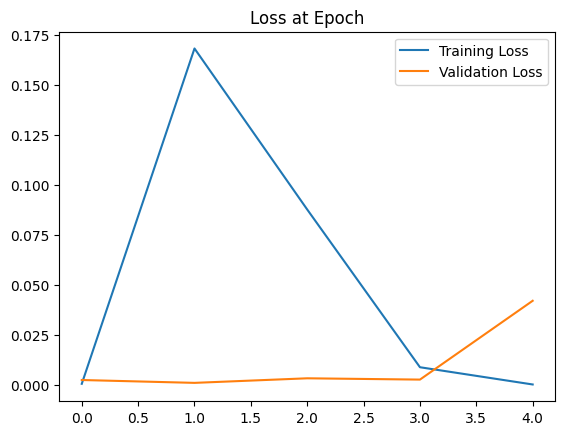

In [7]:
train_losses_items = [tl.item() for tl in train_losses]

# Graph the loss at epoch
plt.plot(train_losses_items, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

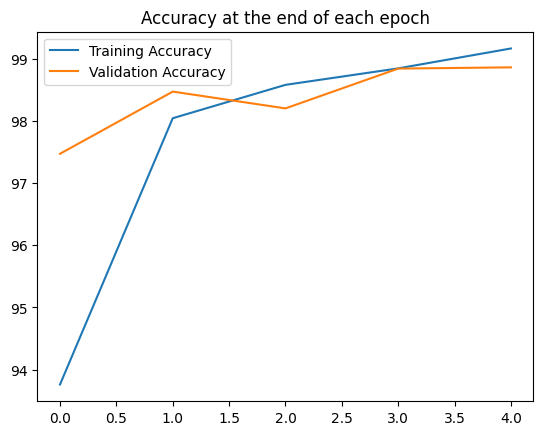

In [8]:
# Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [9]:
# Final testing of the model
final_test_data = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct = 0
  for X_test, y_test in DataLoader(test_data, batch_size=10000, shuffle=False):
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

print(f'Model accuracy: {correct.item()/len(test_data)*100}%')

98.86%


##**Export model**

In [10]:
# Save into .pt file
torch.save(model.state_dict(),'/digit_recognition_model.pt')